Feature Importance Analysis with XGB, SHAP, RFE : Divorce Prediction & Reasons

https://medium.com/@azmine_wasi/divorce-prediction-reasons-feature-importance-analysis-with-xgb-shap-rfe-ba630cb24199

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

In [2]:
from sklearn import manifold
from sklearn.metrics import accuracy_score

In [12]:
df = pd.read_csv("../Data/divorce.csv")
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [13]:
df.shape

(170, 55)

In [14]:
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_899/1704572063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_899/1704572063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_899/1704572063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_899/1704572063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_899/1704572063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_899/1704572063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_899/1704572063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_899/1704572063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

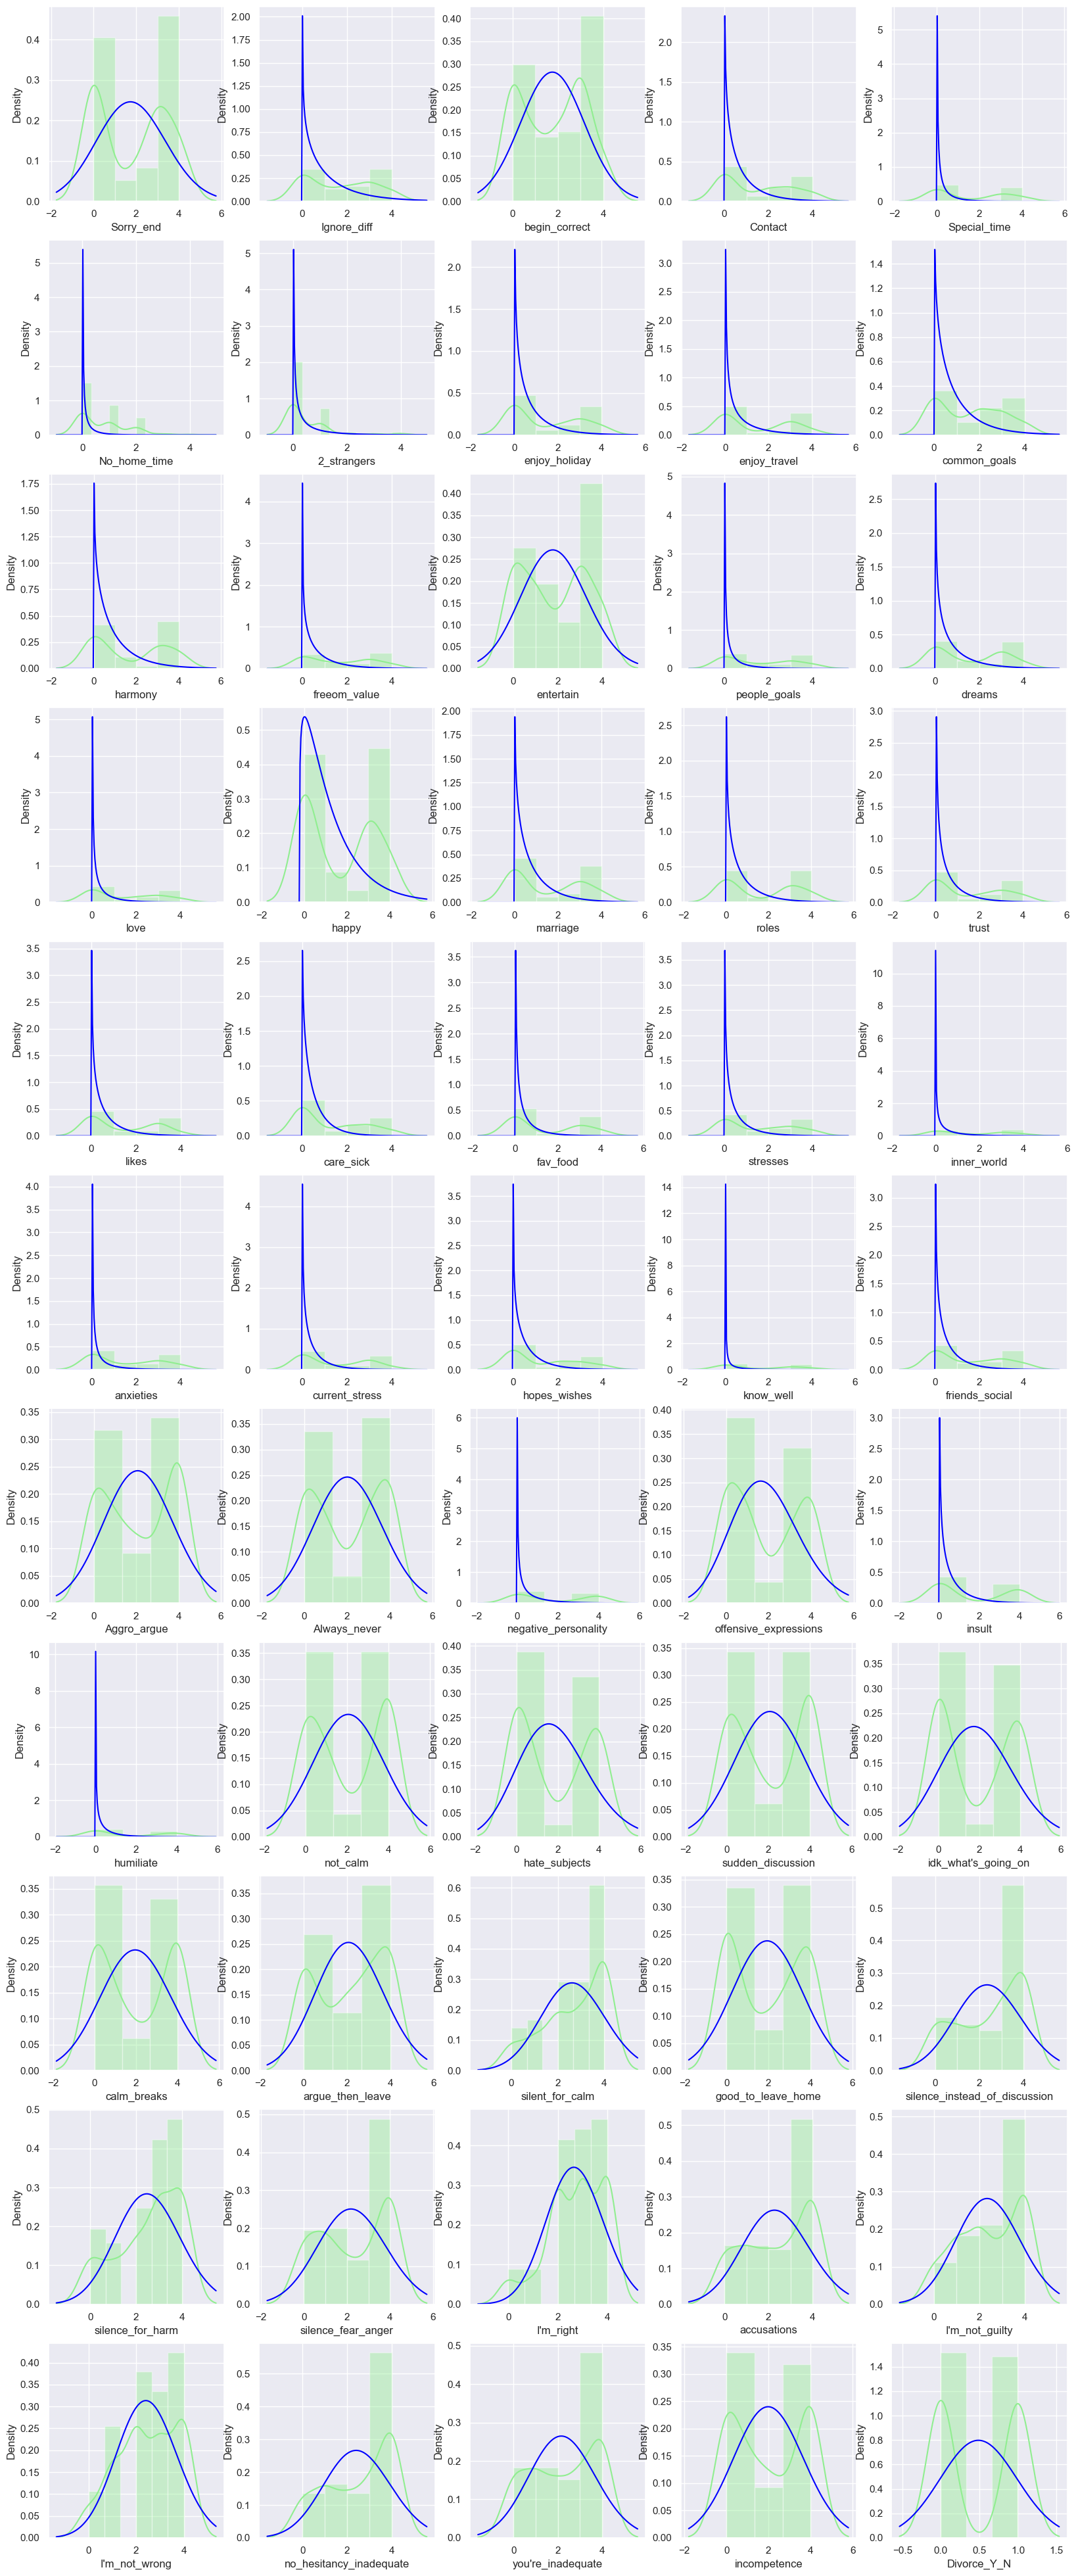

In [17]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(df.columns, 1):
    plt.subplot(11,5,i)
    p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")